In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the dataset
df = pd.read_csv("../day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## EDA

In [4]:
df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windsp

In [5]:
all_cols = df.columns[2:-3]
print(all_cols)
for i in all_cols:
    print(df[i].value_counts())

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64
workingday
1    504
0    226
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64
atemp
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30

In [6]:
# As we can see there are no null values in the data

In [7]:
# removing the unwanter columns
rem_cols = ['instant','dteday','casual','registered']
df.drop(columns = rem_cols , inplace = True)
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


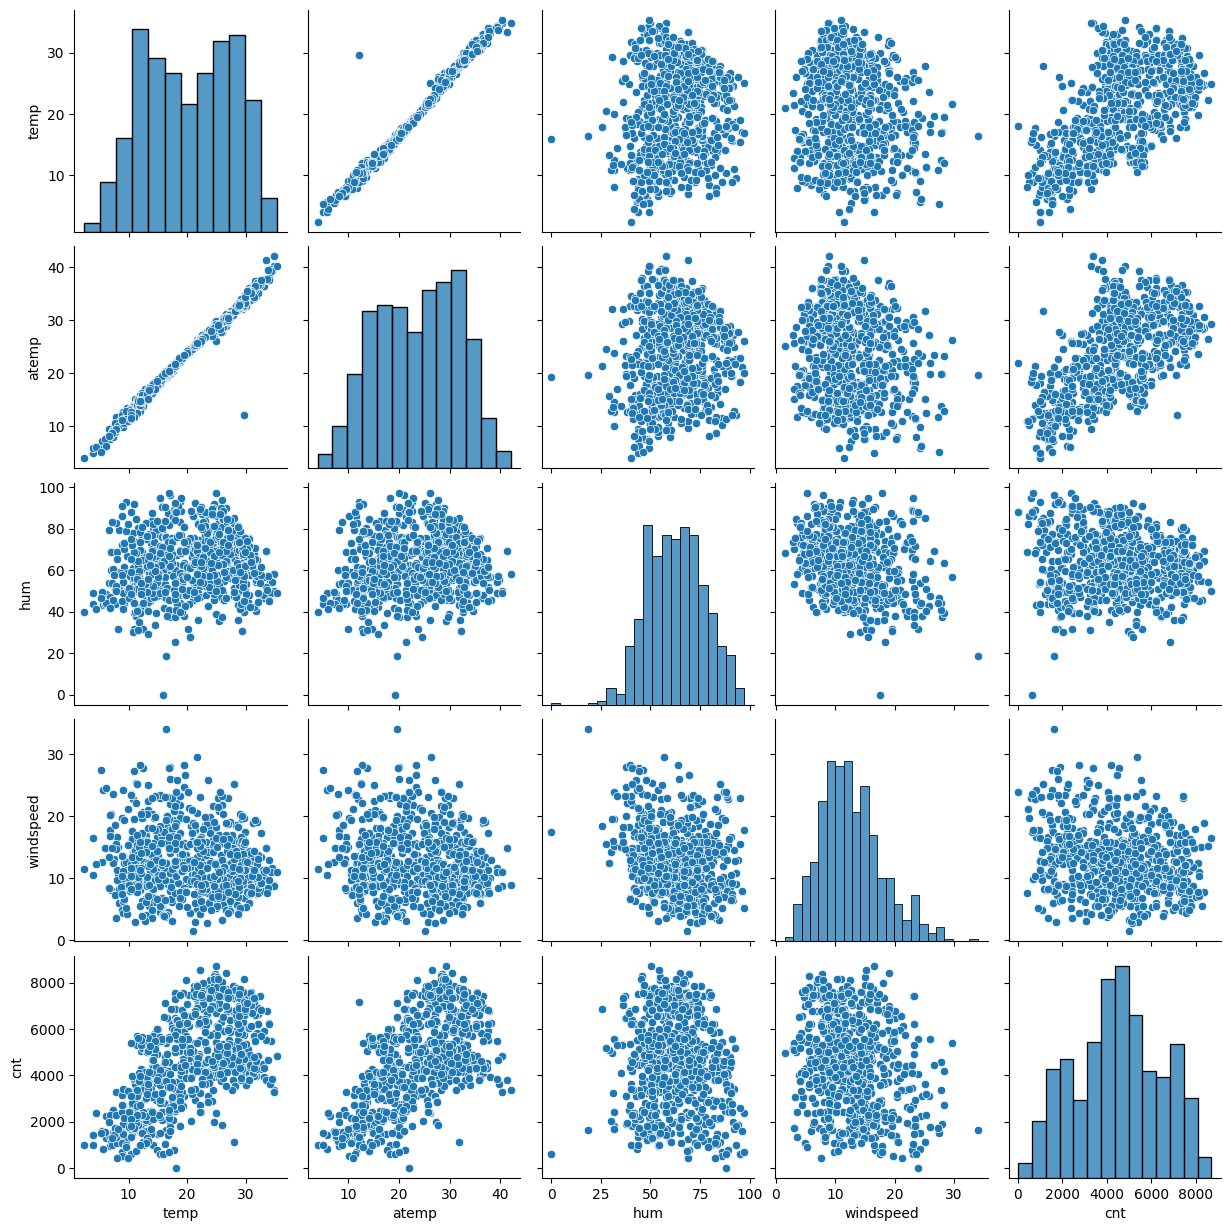

In [8]:
cols = ['temp','atemp',"hum",'windspeed','cnt']
sns.pairplot(df[cols])

<Axes: >

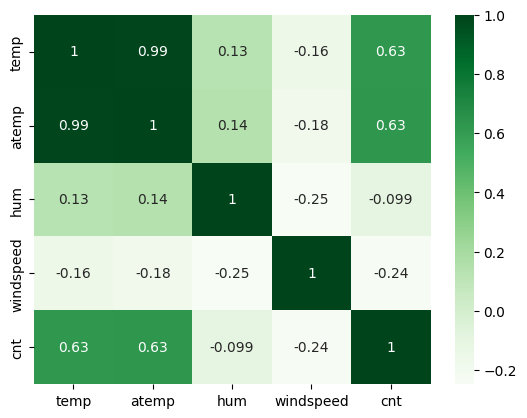

In [9]:
sns.heatmap(df[cols].corr(),annot = True, cmap = "Greens")

In [10]:
# as we can see here is no much corelation beween the variables so we need more variables for our model building
# we can notice that atemp and temp have high correlation so we need to take only one varibale for our model

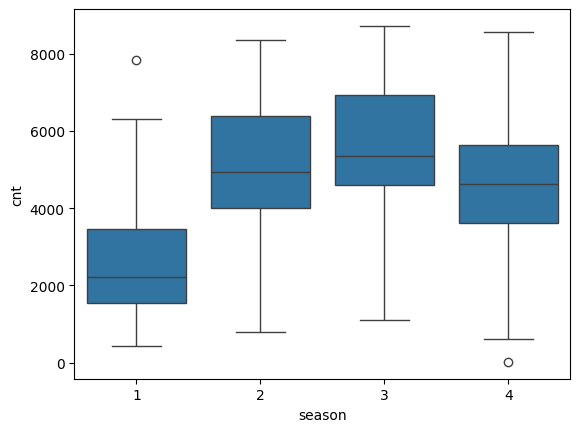

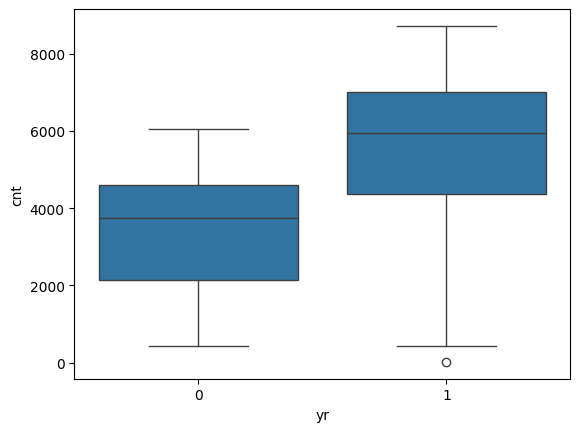

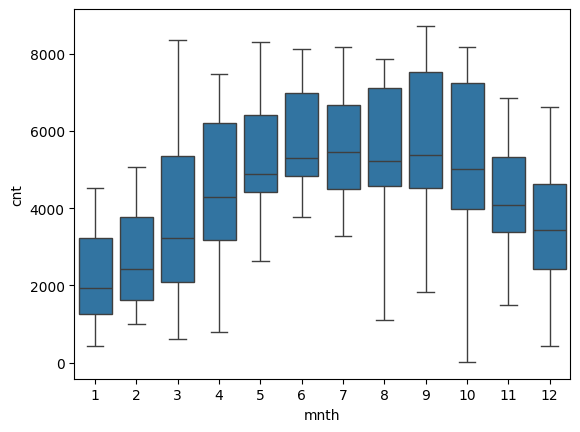

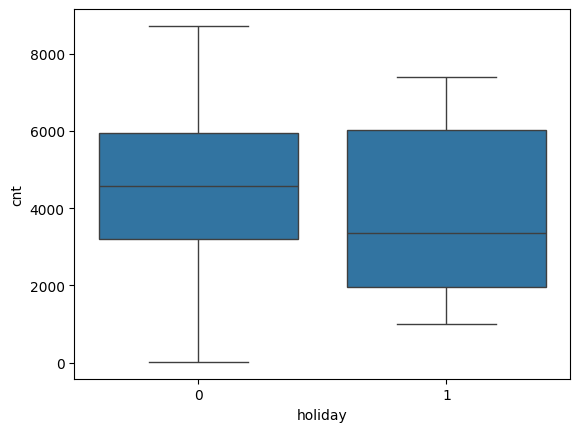

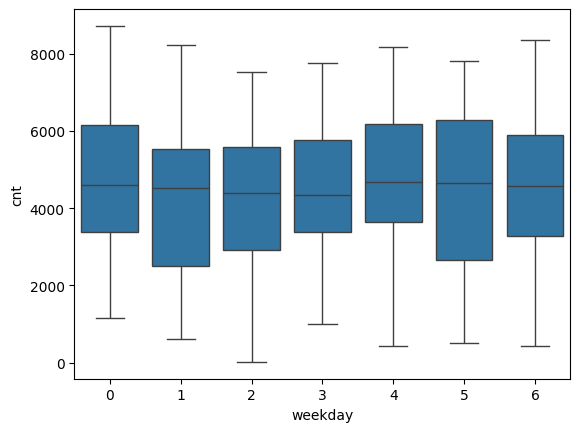

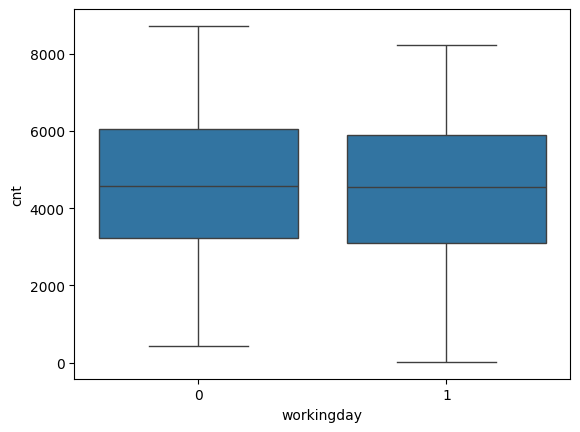

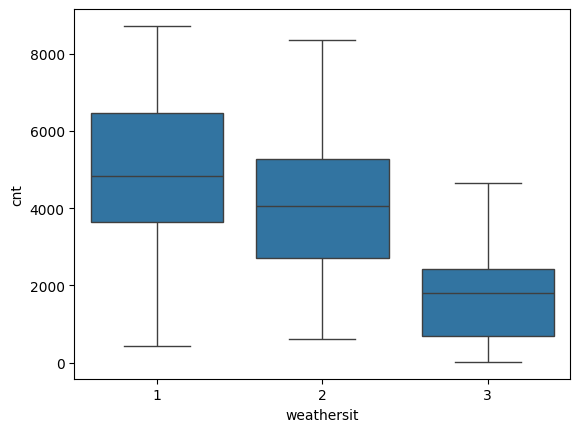

In [11]:
obj_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
df[obj_cols].astype('category')
for i in obj_cols:
    sns.boxplot(data = df , x = i , y='cnt')
    plt.show()

In [12]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Creating dummies for season and dropping the unnecessary columns

df.season.replace([1,2,3,4],['spring','summer','fall','winter'] , inplace = True)
season_dummies = pd.get_dummies(df['season'] ,drop_first= True).astype(int)
df = df.join(season_dummies, how = 'inner')


In [14]:
df.drop(['season'],axis = 1 , inplace = True)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [15]:
# Creating dummies for month and dropping the unnecessary columns
df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov',"dec"] , inplace = True)
mon_dummies = pd.get_dummies(df['mnth'] ,drop_first= True).astype(int)
df = df.join(mon_dummies, how = 'inner')


In [16]:
df.drop(['mnth'],axis = 1, inplace = True)
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [17]:
# Creating dummies for weekday and dropping the unnecessary columns
df.weekday.replace([0,1,2,3,4,5,6],['sun','mon','tue','wed','thu','fri',"sat"] , inplace = True)
week_dummies = pd.get_dummies(df['weekday'] ,drop_first= True).astype(int)
df = df.join(week_dummies, how = 'inner')

In [18]:
df.drop(['weekday'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Creating dummies for weathersit and dropping the unnecessary columns
df.weathersit.replace([1,2,3,4],['w_clear','w_cloudy','w_light_rain','w_heavy_rain'] , inplace = True)
weather_dummies = pd.get_dummies(df['weathersit'] ,drop_first= True).astype(int)
df = df.join(weather_dummies, how = 'inner')

In [20]:
# as we know there are no days of heavy rain we will remove the days with moderate rain as well

df.drop(['weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,w_cloudy,w_light_rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# now we have reshaped all the columns hat are needed for the analysis

## Building the model

In [22]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,w_cloudy,w_light_rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
## we will split the model into test and train data frames

In [24]:
df_train,df_test = train_test_split(df , train_size = 0.70 , random_state = 100)

In [25]:
df_train.shape

(510, 30)

In [26]:
df_test.shape

(220, 30)

In [27]:
# now we need to scale the values using the minmax scaler
# we are using the min max scaler here because it scales all values inbetween 0 and 1 which gives an estimation of how the independant variables 
# affect the dependant variable on an equivalnet scale



In [28]:
scaler = MinMaxScaler()

In [29]:
scale_cols = ['temp', 'hum', 'windspeed','atemp','cnt']
df_train[scale_cols] = scaler.fit_transform(df_train[scale_cols])

In [30]:
df_train[scale_cols].head()

,temp,hum,windspeed,atemp,cnt
576,0.815169,0.725633,0.264686,0.766351,0.827658
426,0.442393,0.640189,0.255342,0.438975,0.465255
728,0.245101,0.498067,0.663106,0.200348,0.204096
482,0.395666,0.504508,0.188475,0.391735,0.482973
111,0.345824,0.751824,0.380981,0.318819,0.191095


In [31]:
# now we will split the test and train dataframes into the target and independant variable dataframes

X_train = df_train.drop(columns=['cnt'])
y_train = df_train.cnt

In [32]:
print(X_train.head(),y_train.head())

     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           1  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   
111   0        0           0  0.345824  0.318819  0.751824   0.380981       0   

     summer  winter  ...  oct  sep  mon  sat  sun  thu  tue  wed  w_cloudy  \
576       0       0  ...    0    0    0    0    0    0    0    1         0   
426       0       0  ...    0    0    0    0    1    0    0    0         1   
728       0       0  ...    0    0    1    0    0    0    0    0         0   
482       1       0  ...    0    0    0    0    1    0    0    0         1   
111       1       0  ...    0    0    0    0    1    0    0    0         1   

     w_light_rain  
576             0  
426 

## Model 1

In [33]:
## Here we are considering all the independant variables 

In [34]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.24e-177
Time:                        20:07:55   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3915      0.085      4.593      0.000       0.224       0.559
yr               0.2312      0.008     28.360      0.000       0.215       0.247
holiday         -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday      -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp             0.3873      0.143      2.699      0.007       0.105       0.669
atemp            0.0547      0.139      0.392      0.695      -0.219       0.329
hum             -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed       -0.1802      0.027     -6.751      0.000      -0.233      -0.128
spring          -0.0409      0.030     -1.349      0.178      -0.100       0.019
summer           0.0458      0.026      1.733      0.084      -0.006       0.098
winter           0.1121      0.028      3.969      0.000       0.057       0.168
aug              0.0291      0.034      0.849      0.396      -0.038       0.096
dec             -0.0444      0.034     -1.308      0.191      -0.111       0.022
feb             -0.0373      0.033     -1.119      0.264      -0.103       0.028
jan             -0.0640      0.034     -1.887      0.060      -0.131       0.003
jul             -0.0274      0.035     -0.773      0.440      -0.097       0.042
jun              0.0097      0.025      0.384      0.701      -0.040       0.059
mar              0.0010      0.025      0.041      0.967      -0.048       0.050
may              0.0256      0.021      1.196      0.232      -0.016       0.068
nov             -0.0395      0.037     -1.076      0.282      -0.112       0.033
oct              0.0058      0.036      0.159      0.874      -0.065       0.077
sep              0.0916      0.032      2.837      0.005       0.028       0.155
mon             -0.0247      0.015     -1.688      0.092      -0.053       0.004
sat             -0.0557      0.072     -0.777      0.438      -0.197       0.085
sun             -0.0499      0.072     -0.696      0.487      -0.191       0.091
thu              0.0042      0.015      0.280      0.780      -0.025       0.034
tue             -0.0261      0.015     -1.776      0.076      -0.055       0.003
wed             -0.0103      0.015     -0.670      0.503      -0.040       0.020
w_cloudy        -0.0578      0.011     -5.486      0.000      -0.079      -0.037
w_light_rain    -0.2492      0.027     -9.324      0.000      -0.302      -0.197
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59e-46
Kurtosis:                       5.724   Cond. No.                         92.4
===============

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,441.522556
4,atemp,382.186719
2,workingday,63.901775
5,hum,41.225904
7,spring,13.517793
9,winter,12.425118
23,sun,12.346254
22,sat,11.835585
8,summer,9.880786
18,nov,7.157154


In [36]:
# as we can see the r2 came out to be 0.848 which is actually good
# But there is little trouble in the number of features we selected and their VIF's
# so we will build another model to a ddress this issue

## Model 2

For this model we will do the feature selection using Recursive Feature Elemination (RFE) and build the model

In [37]:
# we are using the LinearRegression class and fitting the model with the X_train and y_trian data frames
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
# here we are using the RFE feature to elemenate the features and select 12 features

rfe = RFE(lm,n_features_to_select = 12)
rfe = rfe.fit(X_train,y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 13),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 18),
 ('may', False, 12),
 ('nov', False, 3),
 ('oct', False, 16),
 ('sep', True, 1),
 ('mon', False, 11),
 ('sat', False, 8),
 ('sun', False, 9),
 ('thu', False, 17),
 ('tue', False, 10),
 ('wed', False, 14),
 ('w_cloudy', True, 1),
 ('w_light_rain', True, 1)]

In [40]:
col = X_train.columns [rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jul', 'sep', 'w_cloudy', 'w_light_rain'],
      dtype='object')

In [41]:
# we are selecing the X_train to rain the model with the fetures selected by rfe

X_train_rfe = X_train[col]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,jul,sep,w_cloudy,w_light_rain
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,1,0


In [42]:
#Training and fiting the model
model = sm.OLS(y_train,X_train_rfe_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.95e-190
Time:                        20:07:56   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2848      0.034      8.258      0.000       0.217       0.353
yr               0.2294      0.008     28.208      0.000       0.213       0.245
holiday         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp             0.5299      0.034     15.728      0.000       0.464       0.596
hum             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring          -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer           0.0531      0.015      3.536      0.000       0.024       0.083
winter           0.0976      0.017      5.643      0.000       0.064       0.132
jul             -0.0572      0.018     -3.123      0.002      -0.093      -0.021
sep              0.0833      0.017      4.973      0.000       0.050       0.116
w_cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
w_light_rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.026853
2,temp,16.029660
4,windspeed,4.653075
5,spring,4.009485
7,winter,3.331939
6,summer,2.788633
10,w_cloudy,2.284092
0,yr,2.076227
8,jul,1.583964
9,sep,1.384884


In [44]:
## as wew have VIF's greater than 5 we will remove the feature with high p values and high VIF's

## Model 3

##### As we can see here we will not be removing the temp because it has more significance on the outcome

##### Hence we will remove the feature with next high VIF i.e., hum

In [45]:
X_train_rfe = X_train_rfe.drop('hum',axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          5.06e-187
Time:                        20:07:57   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1994      0.030      6.746      0.000       0.141       0.258
yr               0.2336      0.008     28.352      0.000       0.217       0.250
holiday         -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp             0.4910      0.033     14.770      0.000       0.426       0.556
windspeed       -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring          -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer           0.0465      0.015      3.051      0.002       0.017       0.076
winter           0.0817      0.017      4.730      0.000       0.048       0.116
jul             -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep              0.0768      0.017      4.517      0.000       0.043       0.110
w_cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
w_light_rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.091960
3,windspeed,4.600677
5,summer,2.226926
4,spring,2.078996
0,yr,2.067001
6,winter,1.780437
7,jul,1.583937
9,w_cloudy,1.551976
8,sep,1.336854
10,w_light_rain,1.081377


## Model 4

#### As for the same reason mentioned above we will be removing the w_cloudy feature here

In [47]:
X_train_rfe = X_train_rfe.drop('windspeed',axis = 1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          5.71e-181
Time:                        20:07:57   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1501      0.029      5.124      0.000       0.093       0.208
yr               0.2326      0.009     27.333      0.000       0.216       0.249
holiday         -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temp             0.5029      0.034     14.670      0.000       0.436       0.570
spring          -0.0766      0.022     -3.514      0.000      -0.119      -0.034
summer           0.0367      0.016      2.342      0.020       0.006       0.067
winter           0.0829      0.018      4.642      0.000       0.048       0.118
jul             -0.0523      0.019     -2.715      0.007      -0.090      -0.014
sep              0.0812      0.018      4.623      0.000       0.047       0.116
w_cloudy        -0.0785      0.009     -8.669      0.000      -0.096      -0.061
w_light_rain    -0.2989      0.025    -11.756      0.000      -0.349      -0.249
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.218224
0,yr,2.064182
4,summer,1.935973
6,jul,1.582148
5,winter,1.571159
8,w_cloudy,1.551669
3,spring,1.395393
7,sep,1.336428
9,w_light_rain,1.066736
1,holiday,1.042233


In [49]:
# # Let's consider this as our final model
# The r2 is 0.824 and he difference between rsquared and adjusted r squared is also quite low
# All the p values are also in the acceptable range

# Also by using this model we can give the linear equation of the model

### Residual Analysis

In [50]:
y_train_pred = model.predict(X_train_rfe_sm)

In [51]:
res = y_train - y_train_pred

<Axes: ylabel='Density'>

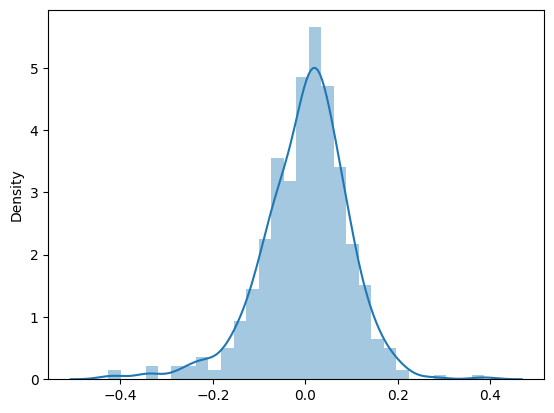

In [52]:
sns.distplot(res)

In [53]:
## we can see the mean of the residuals is 0 and the residuals are normally distributed

## Model Prediction

In [54]:
# scaling the test data sets

scale_cols = ['temp', 'hum', 'windspeed','atemp','cnt']
df_test[scale_cols] = scaler.transform(df_test[scale_cols])

In [55]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,w_cloudy,w_light_rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [56]:
# now we will split the test and train dataframes into the target and independant variable dataframes

X_test = df_test.drop(columns=['cnt'])
y_test = df_test.cnt

In [57]:
X_test = X_test[['yr','holiday','temp','spring','summer','winter','jul','sep','w_cloudy','w_light_rain']]

In [58]:
X_test_sm = sm.add_constant(X_test)

In [59]:
#Prediction with the test data set
y_test_pred = model.predict(X_test_sm)

In [60]:
residuals = y_test_pred - y_test

<Axes: ylabel='Density'>

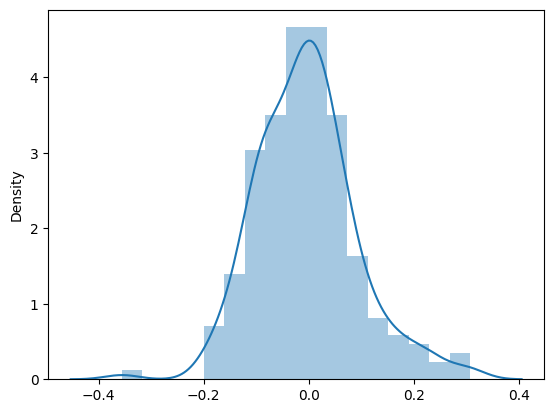

In [61]:
sns.distplot(residuals)

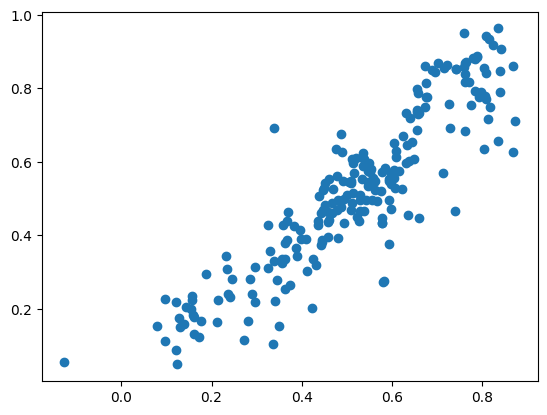

In [62]:
plt.scatter(y_test_pred,y_test)

In [63]:
# checking the r2 score of the test data set
r2_score = r2_score(y_test,y_test_pred)
r2_score

0.8092660294132241

- As we can see the r squared of the the test data is 0.82 and the rsquared of model is 0.80 which is almost similar so we can conclude that the model is a good model

- Also the equation is
- y = 0.1501 + 0.2326*(yr) - 0.1003*(holiday) + 0.5029*(temp) - 0.0766*(spring) + 0.0367*(summer) + 0.0829*(winter) - 0.0523*(jul) + 0.0812*(sep) -0.0785*(w_cloudy) - 0.2989*(W_light_rain)49	-0.249


In [64]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.0088558680539834
Mean squared error of the test set is 0.009119807381204638


- From the linear regression equiation we can iner that the demand is based on various factors such as temperature, year, holiday, month and so on
- From this data we can suggest how much variance can be seen in demand w.r.t each of the factor that influences the demand
- By giving this insight we can help the company to understand their bussiness insights and they;ll be able to formulate their strategy accordingly
  
-  Using drop_first = True in the dummies is to prevent the data from multicolleniarity
-  Temperature has the highest correlation with cnt
-  By plotting histogram and the residula analysis
-  The top three feautres that are significantly contributing the demand are  year, holiday,temp on tha day